In [1]:
import seaborn as sns
import pandas as pd
import statistics as st

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance
from sklearn import metrics

In [2]:
restrictions = pd.read_csv('restrictions.csv')

In [3]:
cols = list(restrictions.columns)
cols.remove('ConfirmedChange')
cols.remove('DeathsChange')

In [4]:
cor = restrictions[cols].corr().dropna(axis=0, how='all').dropna(axis=1, how='all')


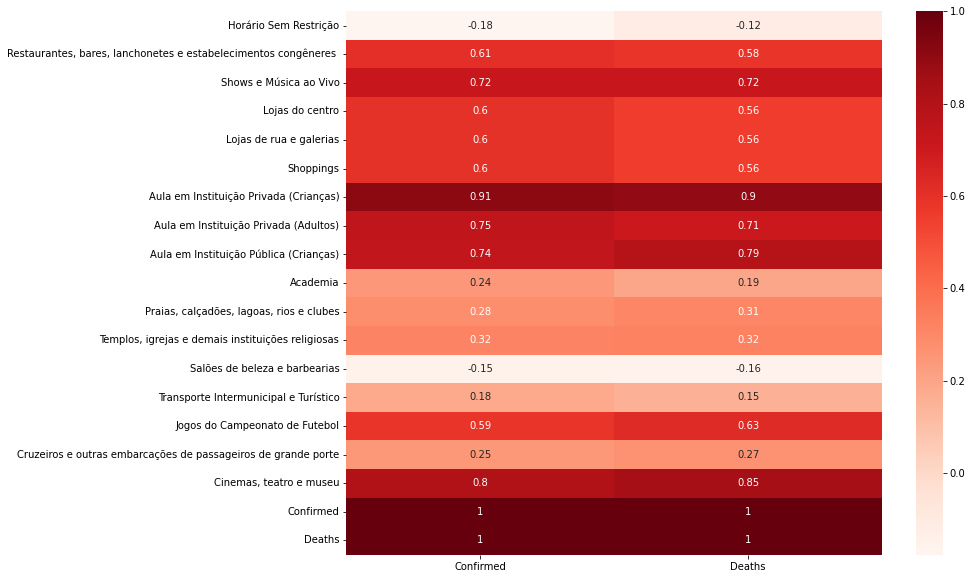

In [5]:
plt.figure(figsize=(12,10))

sns.heatmap(cor[['Confirmed', 'Deaths']], annot=True, cmap=plt.cm.Reds)
plt.show()

In [6]:
cor_target = abs(cor['Confirmed'])

relevant_features = cor_target[cor_target > 0.5].dropna(axis=0, how='all')

relevant_features.drop(['Confirmed', 'Deaths'], inplace=True)
relevant_features = relevant_features.sort_values(ascending=False)

In [7]:
print(relevant_features)

Aula em Instituição Privada (Crianças)                             0.910190
Cinemas, teatro e museu                                            0.803286
Aula em Instituição Privada (Adultos)                              0.749273
Aula em Instituição Pública (Crianças)                             0.744261
Shows e Música ao Vivo                                             0.716717
Restaurantes, bares, lanchonetes e estabelecimentos congêneres     0.608861
Lojas do centro                                                    0.600109
Lojas de rua e galerias                                            0.600109
Shoppings                                                          0.600109
Jogos do Campeonato de Futebol                                     0.585320
Name: Confirmed, dtype: float64


In [8]:
test = restrictions.copy()


In [9]:
media = st.mean(list(test['Confirmed']))

In [10]:
test['test'] = [1 if i else 0 for i in test['Confirmed'] >= media]  

In [11]:
X = test.copy()
X.drop(['Data inicial', 'Data Final', 'Deaths', 'Confirmed', 'DeathsChange', 'ConfirmedChange', 'test'], axis=1, inplace=True)
y = test['test'].copy() 

In [12]:
cv = KFold(n_splits=5)
mean_squared = []
f1_score = []
precision = []

for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf = RandomForestClassifier(criterion='entropy', random_state=13)

    rf.fit(X_train, y_train)
    rf.score(X_test, y_test)
    y_pred = rf.predict(X_test)

    precision.append(metrics.precision_score(y_test, y_pred))
    mean_squared.append(metrics.mean_squared_error(y_test, y_pred))
    f1_score.append(metrics.f1_score(y_test, y_pred))
        

C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [13]:
print(f'Mean Squared Error: {st.mean(mean_squared)}')
print(f'F1 Score: : {st.mean(f1_score)}')
print(f'Precision: {st.mean(precision)}')


Mean Squared Error: 0.25
F1 Score: : 0.5
Precision: 0.6


In [14]:
rf = RandomForestClassifier(criterion='entropy', random_state=13)
rf = rf.fit(X, y)

Text(0.5, 0, 'Random Forest Feature Importance')

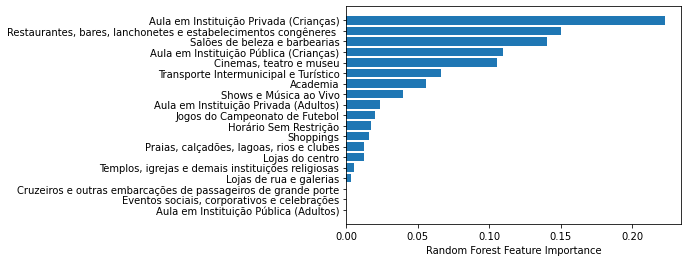

In [15]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [17]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 13,
 'verbose': 0,
 'warm_start': False}